## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Constants

In [2]:
n = 5000 # Загальна кількість відліків
N = 4096 # довжина інтервалу

## Signal generation

In [3]:
x = np.zeros(n) # Масив для зберігання значень процесу

In [4]:
# Згенерувати нормальний білий шум
theta = np.random.randn(n)

In [5]:
# Початкові умови
x[0] = 0
x[1] = 0

In [6]:
# Згенерувати процес
for i in range(2, n):
    x[i] = theta[i] + x[i-1] - 0.5*x[i-2]

In [7]:
# видалення перехідного процесу
x = x[3:N+3]

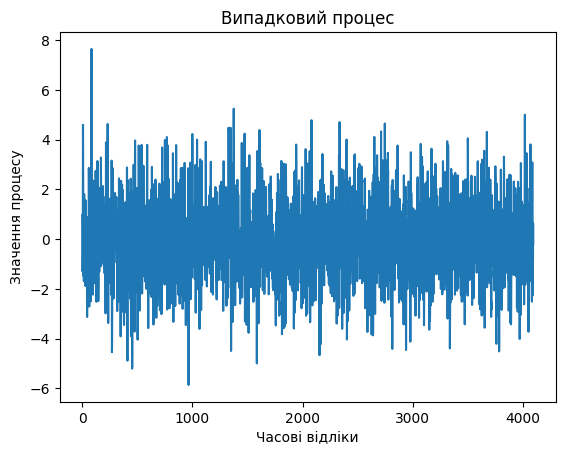

In [8]:
plt.plot(x)
plt.title('Випадковий процес')
plt.xlabel('Часові відліки')
plt.ylabel('Значення процесу')
plt.show()

## No window

In [9]:
M_values = [128, 512, 1024]

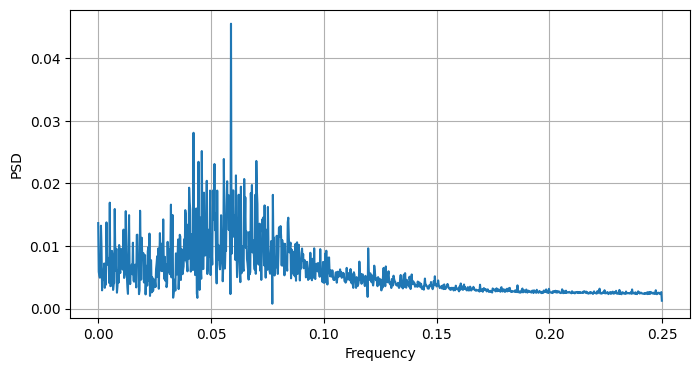

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 4096
M = 1024

# Generate random process x
x = np.zeros(N)
x[0], x[1] = 0, 0
for i in range(2, N):
    x[i] = np.random.normal() + x[i-1] - 0.5*x[i-2]

    
t = np.arange(0, 5*np.pi, N)
y = 0.1*np.sin(2*np.pi*0.15*t)

x += y
    
# Compute autocorrelation
corr = np.correlate(x, x, mode='full')

# Trim correlation function
corr = corr[N-1:]
corr = corr / (N * M)
corr = corr[:int(N/2)]

# Compute PSD
f = np.linspace(0, 0.5, len(corr))
psd = np.abs(np.fft.fft(corr))
psd = psd[:len(corr)//2]
psd[1:-1] *= 2

# Plot PSD
plt.figure(figsize=(8, 4))
plt.plot(f[:len(f)//2], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.show()

## Hamming

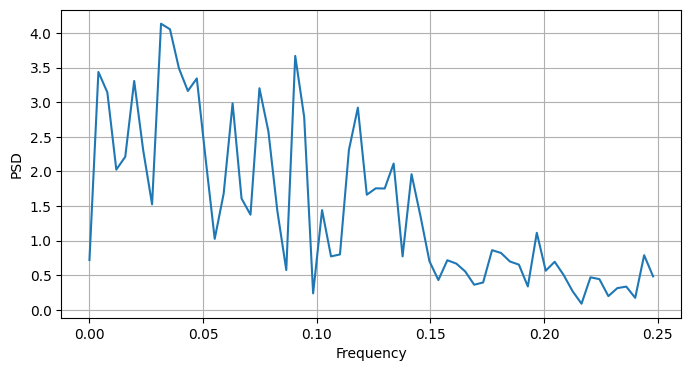

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 4096
M = 128

# Generate random process x
x = np.zeros(N)
x[0], x[1] = 0, 0
for i in range(2, N):
    x[i] = np.random.normal() + x[i-1] - 0.5*x[i-2]

# Apply Hamming window
window = np.hamming(M)
x_windowed = np.reshape(x[:N//M*M], (-1, M)) * window

# Compute autocorrelation
corr = np.zeros(M)
for i in range(M):
    corr[i] = np.mean(x_windowed[:, i] * x_windowed[:, 0])

# Apply Hamming correction factor
corr /= np.mean(window)**2

# Compute PSD
f = np.linspace(0, 0.5, len(corr))
psd = np.abs(np.fft.fft(corr))
psd = psd[:len(corr)//2]
psd[1:-1] *= 2

# Plot PSD
plt.figure(figsize=(8, 4))
plt.plot(f[:len(f)//2], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.show()

## Kaiser

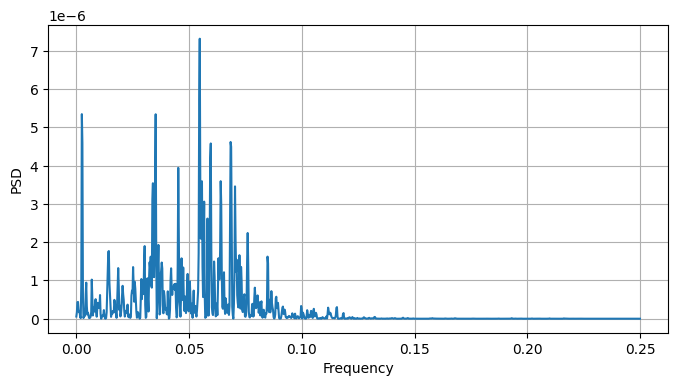

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window

N = 4096
M = 128

# Generate random process x
x = np.zeros(N)
x[0], x[1] = 0, 0
for i in range(2, N):
    x[i] = np.random.normal() + x[i-1] - 0.5*x[i-2]

# Compute autocorrelation
corr = np.correlate(x, x, mode='full')

# Trim correlation function
corr = corr[N-1:]
corr = corr / (N * M)
corr = corr[:int(N/2)]

# Compute PSD with Kaiser window
window = get_window(('kaiser', 10), len(corr))
psd = np.abs(np.fft.fft(corr*window))**2 / np.sum(window**2)
psd = psd[:len(corr)//2]
psd[1:-1] *= 2

# Plot PSD
f = np.linspace(0, 0.5, len(corr))
plt.figure(figsize=(8, 4))
plt.plot(f[:len(f)//2], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.show()


## Blackman

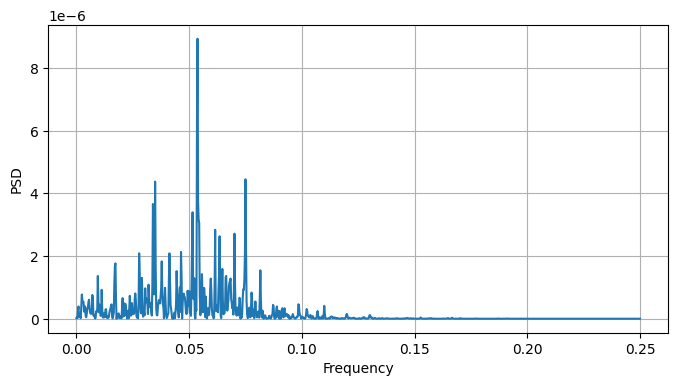

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window

N = 4096
M = 128

# Generate random process x
x = np.zeros(N)
x[0], x[1] = 0, 0
for i in range(2, N):
    x[i] = np.random.normal() + x[i-1] - 0.5*x[i-2]

# Compute autocorrelation
corr = np.correlate(x, x, mode='full')

# Trim correlation function
corr = corr[N-1:]
corr = corr / (N * M)
corr = corr[:int(N/2)]

# Compute PSD with Kaiser window
window = get_window("blackman", len(corr))
psd = np.abs(np.fft.fft(corr*window))**2 / np.sum(window**2)
psd = psd[:len(corr)//2]
psd[1:-1] *= 2

# Plot PSD
f = np.linspace(0, 0.5, len(corr))
plt.figure(figsize=(8, 4))
plt.plot(f[:len(f)//2], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.show()

## Додавання періодичної складової

In [14]:
t = np.arange(0, 5*np.pi, N)
y = 0.1*np.sin(2*np.pi*0.15*t)

In [15]:
x += y

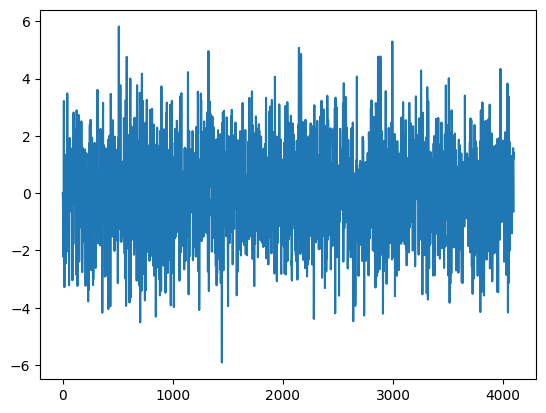

In [16]:
plt.plot(x)
plt.show()

## СГП

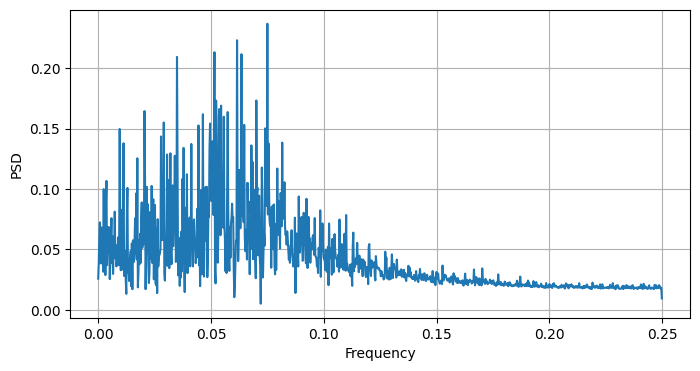

In [17]:
# Compute autocorrelation
corr = np.correlate(x, x, mode='full')

# Trim correlation function
corr = corr[N-1:]
corr = corr / (N * M)
corr = corr[:int(N/2)]

# Compute PSD
f = np.linspace(0, 0.5, len(corr))
psd = np.abs(np.fft.fft(corr))
psd = psd[:len(corr)//2]
psd[1:-1] *= 2

# Plot PSD
plt.figure(figsize=(8, 4))
plt.plot(f[:len(f)//2], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [18]:
peak_idx = np.argmax(psd)
peak_freq = f[peak_idx]

In [20]:
print("Частота періодичного процесу:",peak_freq)

Частота періодичного процесу: 0.07498778700537372
